# Introduction to Importing Data in Python

The 14th course in the career track **Data Scientist with Python**.

In this course, you'll learn the many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL.

1. Read flat files: [use NumPy](#1.2.1-Using-NumPy), or [use Pandas](#1.2.2-Using-Pandas) method `read_csv()`.
3. [Read pickle files](#2.1-Pickled-file): use the package `pickle`.
4. [Read Excel files](#2.2-Excel-file): use Pandas method `read_excel()`, or use Pandas class `ExcelFile`.
5. [Read SAS files](#2.3-SAS-file): use the package `sas7bdat`.
6. [Read Stata files](#2.4-Stata-file): use Pandas method `read_stata()`.
7. [Read HDF5 files](#2.5-HDF5-file): use the package `h5py`.
8. [Read MATLAB files](#2.6-MATLAB-file): use the module `scipy.io`.
9. Relational databases: query data [using a connection](#3.1-Query-data-using-a-connection), or [using Pandas](#3.2-Query-data-using-Pandas-method) method `read_sql_query()`

## 1. Flat files

Flat files are text files containing records. That is table data.
- file extension: `.csv` (comma separated values), `.txt`
- record: row of fields (attributes)
- column: feature (attribute)
- delimiters: commas, tabs

### 1.1 Read text files

In [1]:
filepath = "data/moby_dick.txt"

#### Read entire file

In [2]:
with open(filepath, "r") as fp:
    data = fp.read()
print(data)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

#### Read file line by line

In [3]:
nb_lines = 4  # read the first 4 lines
with open(filepath, "r") as fp:
    for i in range(nb_lines):
        line = fp.readline()
        print(line)

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having

little or no money in my purse, and nothing particular to interest me on



### 1.2 Read flat files

#### Data files

In [4]:
digits_file = "data/digits.csv"
digits_header_file = "data/digits_header.txt"

`digits.csv` is a part of [MNIST dataset](http://yann.lecun.com/exdb/mnist/) in CSV format. It contains 100 rows. Each row consists of 785 values:
- the first value is the label (a number from 0 to 9)
- the remaining 784 values are the pixel values (a number fro 0 to 255) of an image of size 28x28.

More information about the MNIST dataset provided in a CSV format is at [kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv).

`digits_header.txt` is similar to `digits.csv` except that:
- it has headers at the first line.
- the delimiter is a tab.

In [5]:
sea_slug_file = "data/seaslug.txt"

`seaslug.txt` consists of percentage of a sea slug larvae that had metamorphosed in a given time period.
- it has a text header consisting of strings
- the remaing rows consisting numbers
- it is tab delimited

More information about seaslug at [Sea Slug Data](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html)

In [6]:
titanic_file = "data/titanic.csv"

`titanic.csv` is a part of the dataset at [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data) at kaggle.

#### 1.2.1 Using NumPy

- all columns have the same data type: use the method `loadtxt()`.
- columns have different data types: use one of methods: `genfromtxt()`, `recfromcsv()`, or `recfromtxt()`.

In [7]:
import numpy as np

##### Using the method `loadtxt()`

This method reads data in a file then returns a numpy array. It **requires all elements having the same data type**.

By default, the data type of the output array is `float`. We can change it by giving value to the parameter `dtype` of the method.

###### Data doesn't have headers

In [8]:
data = np.loadtxt(digits_file, delimiter=",")

In [9]:
print(data[:5,:])
print(data.shape)
print(data.dtype)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 785)
float64


In [10]:
import matplotlib.pyplot as plt

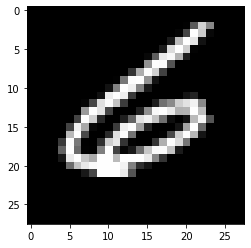

label: 6


In [11]:
# cast type of entire elements to int
data = data.astype("int")

# show an image with its label
label, im_flat = data[21,0], data[21,1:]
im = np.reshape(im_flat, (28, 28))
plt.imshow(im, cmap="gray")
plt.show()
print("label: %s" % label)

###### Data has a row of headers and we skip it

In [12]:
data = np.loadtxt(digits_header_file, delimiter="\t", skiprows=1)

Parameters:
- `delimiter`: delimiter in the reading file.
- `skiprows`: a number specifies **how many rows to skip**.

In [13]:
print(data[:5,:])
print(data.shape)
print(data.dtype)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 785)
float64


Another useful parameter of this method is `usecols`. It receives a list of the **indices of columns to keep**.

In [14]:
data = np.loadtxt(digits_file, delimiter=",", usecols=[0, 2])

In [15]:
print(data[:5,:])
print(data.shape)
print(data.dtype)

[[1. 0.]
 [0. 0.]
 [1. 0.]
 [4. 0.]
 [0. 0.]]
(100, 2)
float64


###### Data has a row of headers and we keep it

In [16]:
data_header = np.loadtxt(sea_slug_file, dtype='str', delimiter="\t")

In [17]:
print(data_header.shape)
print(data_header[:5,:])

(48, 2)
[['Time' 'Percent']
 ['99' '0.067']
 ['99' '0.133']
 ['99' '0.067']
 ['99' '0']]


In [18]:
header, data = data_header[0,:], data_header[1:,:].astype("float")

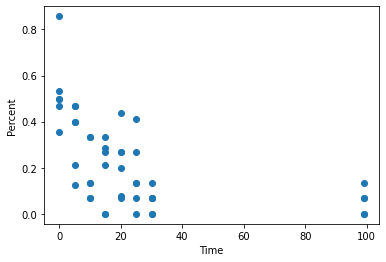

In [19]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel(header[0])
plt.ylabel(header[1])
plt.show()

##### Using the method `genfromtxt()`

This method can read flat files in which **columns have different data types** by indicating the value of the parameter `dtype` is `None`.

The resulting returned is a structured array object where each element of the array is a row of the flat file imported.

In the data returned, we can:
- access row by the index, for example, `data[2]`
- access column by the column name, for example, `data["Pclass"]`
- access an element by row index & column name/column index, for example, `data[2]["Pclass"]`, `data[2][2]`

In [20]:
data = np.genfromtxt(titanic_file, delimiter=",", names=True, dtype=None, encoding=None)

Parameters:
- `names`: True, specifying the file has headers
- `dtype`: None, data types will be determined by the contents of each column individually
- `encoding`: None, use the system default encoding to decode the file.

In [21]:
headers = list(data.dtype.fields.keys())
print(headers)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [22]:
print(data.shape)
print(data[:5])
print(data["Pclass"])
print(data[2]["Pclass"])

(891,)
[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')
 (4, 1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')
 (5, 0, 3, 'male', 35., 0, 0, '373450',  8.05  , '', 'S')]
[3 1 3 1 3 3 1 3 3 2 3 1 3 3 3 2 3 2 3 3 2 2 3 1 3 3 3 1 3 3 1 1 3 2 1 1 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 3 3 1 1 3 1 3 2 3 3 3 2 3 2 3
 3 3 3 3 2 3 3 3 3 1 2 3 3 3 1 3 3 3 1 3 3 3 1 1 2 2 3 3 1 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 2 1 3 2 3 2 2 1 3 3 3 3 3 3 3 3 2 2 2 1 1 3 1 3 3 3 3 2 2 3 3
 2 2 2 1 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 1 3 1 3 3 3 1 3 3 1 2 3 3 2 3 2 3
 1 3 1 3 3 2 2 3 2 1 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 2 3 2 3 1 3 2 1 2 3 2
 3 3 1 3 2 3 2 3 1 3 2 3 2 3 2 2 2 2 3 3 2 3 3 1 3 2 1 2 3 3 1 3 3 3 1 1 1
 2 3 3 1 1 3 2 3 3 1 1 1 3 2 1 3 1 3 2 3 3 3 3 3 3 1 3 3 3 2 3 1 1 2 3 3 1
 3 1 1 1 3 3 3 2 3 1 1 1 2 1 1 1 2 3 2 3 2 2 1 1 3 3 2 2 3 1 3 2 3 1 3 1 1

##### Using the method `recfromcsv()`

This method is similar to the method `genfromtxt()` except that:
- the `delimiter` is set to comma `,` by default.
- the `dtype` is set to `None` by default.
- the `names` is set to `True` by default.
- headers are in lower case.

In [23]:
data = np.recfromcsv(titanic_file, encoding=None)

In [24]:
headers = list(data.dtype.fields.keys())
print(headers)

['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [25]:
print(data.shape)
print(data[:5])
print(data["pclass"])
print(data[2]["pclass"])

(891,)
[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')
 (4, 1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')
 (5, 0, 3, 'male', 35., 0, 0, '373450',  8.05  , '', 'S')]
[3 1 3 1 3 3 1 3 3 2 3 1 3 3 3 2 3 2 3 3 2 2 3 1 3 3 3 1 3 3 1 1 3 2 1 1 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 3 3 1 1 3 1 3 2 3 3 3 2 3 2 3
 3 3 3 3 2 3 3 3 3 1 2 3 3 3 1 3 3 3 1 3 3 3 1 1 2 2 3 3 1 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 2 1 3 2 3 2 2 1 3 3 3 3 3 3 3 3 2 2 2 1 1 3 1 3 3 3 3 2 2 3 3
 2 2 2 1 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 1 3 1 3 3 3 1 3 3 1 2 3 3 2 3 2 3
 1 3 1 3 3 2 2 3 2 1 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 2 3 2 3 1 3 2 1 2 3 2
 3 3 1 3 2 3 2 3 1 3 2 3 2 3 2 2 2 2 3 3 2 3 3 1 3 2 1 2 3 3 1 3 3 3 1 1 1
 2 3 3 1 1 3 2 3 3 1 1 1 3 2 1 3 1 3 2 3 3 3 3 3 3 1 3 3 3 2 3 1 1 2 3 3 1
 3 1 1 1 3 3 3 2 3 1 1 1 2 1 1 1 2 3 2 3 2 2 1 1 3 3 2 2 3 1 3 2 3 1 3 1 1

#### 1.2.2 Using Pandas

The method `read_csv()` is used to read flat files. By default, it considers:
- the file has headers.
- the delimiter is comma.
- data types of columns will be determined by the contents individually.

In [26]:
import pandas as pd

##### Normal CSV file

In [27]:
df = pd.read_csv(titanic_file)

In [28]:
# explorer data
display(df.head())
print(df.dtypes)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [29]:
# get headers
headers = list(df.columns)
print(headers)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [30]:
# convert to numpy array
data = df.values
type(data)

numpy.ndarray

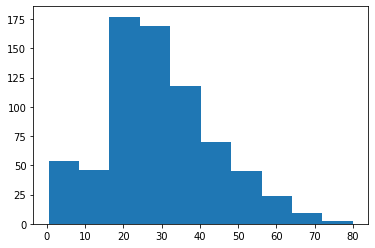

In [31]:
plt.hist(df['Age'])
plt.show()

##### Non-header file

In [32]:
df = pd.read_csv(digits_file, header=None)

In [33]:
display(df.head())
print(df.shape)
print(df.dtypes)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(100, 785)
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
780    float64
781    float64
782    float64
783    float64
784    float64
Length: 785, dtype: object


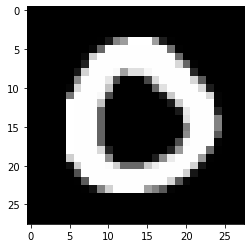

label: 0


In [34]:
# show an image with its label
data = df.values[4].astype("int")
label, im_flat = data[0], data[1:]
im = np.reshape(im_flat, (28, 28))
plt.imshow(im, cmap="gray")
plt.show()
print("label: %s" % label)

##### Tab delimiter file

In [35]:
df = pd.read_csv(sea_slug_file, sep="\t")

In [36]:
display(df.head())
print(df.shape)
print(df.dtypes)

,Time,Percent
0,99,0.067
1,99,0.133
2,99,0.067
3,99,0.000
4,99,0.000


(47, 2)
Time         int64
Percent    float64
dtype: object


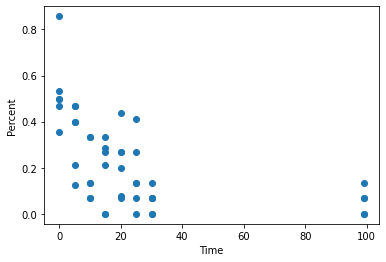

In [37]:
plt.scatter(df.Time, df.Percent)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

## 2. Other file types

In the first section, we learn how to import flat files, but there are many other file types we will potentially have to work with as a data scientist. In this section, we'll figure out how to import data into Python from a wide array of important file types. These include pickled files, Excel spreadsheets, SAS and Stata files, HDF5 files, a file type for storing large quantities of numerical data, and MATLAB files.

### Data files

In [38]:
pickle_file = "data/data.pkl"

`data.pkl` contains a dictionary which is serialized in bytes.

In [39]:
battle_file = "data/battledeath.xlsx"

The spreadsheet `battledeath.xlsx` is modified from the Peace Research Institute Oslo's (PRIO) [dataset](https://www.prio.org/Data/Armed-Conflict/Battle-Deaths/The-Battle-Deaths-Dataset-version-30/). This data contains age-adjusted mortality rates due to war in various countries over several years.

In [40]:
sales_file = "data/sales.sas7bdat"

The data `sales.sas7bdat` are adapted from the website of the undergraduate text book [Principles of Econometrics](http://www.principlesofeconometrics.com/) by Hill, Griffiths and Lim.

In [41]:
disarea_file = "data/disarea.dta"

The data file `disarea.dta` consists of disease extents for several diseases in various countries (more information can be found [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SPHS5E)).

In [42]:
ligo_file = "data/LIGO_data.hdf5"

You can find the LIGO data plus loads of documentation and tutorials [here](https://losc.ligo.org/events/GW150914/). There is also a great tutorial on Signal Processing with the data [here](https://www.gw-openscience.org/GW150914data/LOSC_Event_tutorial_GW150914.html).

In [43]:
albeck_file = "data/albeck_gene_expression.mat"

`albeck_gene_expression.mat` contains [gene expression data](https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm) from the Albeck Lab at UC Davis.

### 2.1 Pickled files

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want to be able to import them into Python, you can **serialize** them. All this means is converting the object into a **sequence of bytes, or a bytestream**.

In [44]:
import pickle

In [45]:
# load data
with open(pickle_file, "rb") as fp:
    data = pickle.load(fp)
print(data)
print(type(data))

{'June': 69.4, 'Aug': 85, 'Airline': 8, 'Mar': 84.4}
<class 'dict'>


In [46]:
# serialize data
with open(pickle_file, "wb") as fp:
    pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)

- The advantage of `HIGHEST_PROTOCOL` is that files get smaller. This makes unpickling sometimes much faster.
- The **maximum file size** of pickle is about 2GB.

### 2.2 Excel files

In [47]:
import pandas as pd

#### Using the method `read_excel()`

In [48]:
# read the first sheet
df = pd.read_excel(battle_file, engine="openpyxl")

- The latest version of xlrd (2.0.1) only supports `.xls` files. The reason `xlsx` support was removed is because it had potential security vulnerabilities and no-one was maintaining it.
- The engine `openpyxl` is used to read `.xlsx` file.

In [49]:
display(df.head())
print(df.shape)

,"War, age-adjusted mortality due to",2002,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Afghanistan,36.083990,NaN,NaN,NaN
1,Albania,0.128908,NaN,NaN,NaN
2,Algeria,18.314120,NaN,NaN,NaN
3,Andorra,0.000000,NaN,NaN,NaN
4,Angola,18.964560,NaN,NaN,NaN


(192, 5)


In [50]:
# read all sheets
data = pd.read_excel(battle_file, engine="openpyxl", sheet_name=None)

- `sheet_name=None` to read all sheets in the Excel file.
- The returned data is a dictionary which has keys contain sheet names, values are dataframes.

In [51]:
# get sheet names
sheet_names = data.keys()
print(sheet_names)
# explorer data
display(data["2002"].head())
display(data["2004"].head())

dict_keys(['2002', '2004'])


,"War, age-adjusted mortality due to",2002,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Afghanistan,36.083990,NaN,NaN,NaN
1,Albania,0.128908,NaN,NaN,NaN
2,Algeria,18.314120,NaN,NaN,NaN
3,Andorra,0.000000,NaN,NaN,NaN
4,Angola,18.964560,NaN,NaN,NaN


,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


#### Using the class `ExcelFile()`

In [52]:
xls = pd.ExcelFile(battle_file, engine="openpyxl")

Return an ExcelFile object.

In [53]:
# get sheet names
sheet_names = xls.sheet_names
print(sheet_names)

['2002', '2004']


In [54]:
# read a sheet by its index
df = xls.parse(0)
# explorer data
display(df.head())
print(df.shape)

,"War, age-adjusted mortality due to",2002,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Afghanistan,36.083990,NaN,NaN,NaN
1,Albania,0.128908,NaN,NaN,NaN
2,Algeria,18.314120,NaN,NaN,NaN
3,Andorra,0.000000,NaN,NaN,NaN
4,Angola,18.964560,NaN,NaN,NaN


(192, 5)


In [55]:
# read a sheet by its name
df = xls.parse("2004")
# explorer data
display(df.head())
print(df.shape)

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


(192, 2)


### 2.3 SAS files

SAS file is a Statistical Analysis Software file. It has extension `.sas7bdat` (storing dataset) or `.sas7bcat` (storing SAS catalog).

We use the package `sas7bdat` to read SAS files.

In [56]:
from sas7bdat import SAS7BDAT

In [57]:
with SAS7BDAT(sales_file) as fp:
    df = fp.to_data_frame()

In [58]:
display(df.head())
print(df.shape)

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


(36, 3)


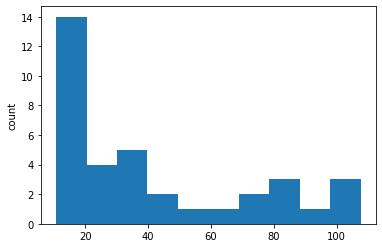

In [59]:
plt.hist(df["P"])
plt.ylabel("count")
plt.show()

### 2.4 Stata files

Stata file stores statistic and data. It has extension `.dta`.

We use the Pandas method `read_stata()` to read Stata files.

In [60]:
import pandas as pd

In [61]:
df = pd.read_stata(disarea_file)

In [62]:
display(df.head())
print(df.shape)

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,...,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,...,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


(164, 27)


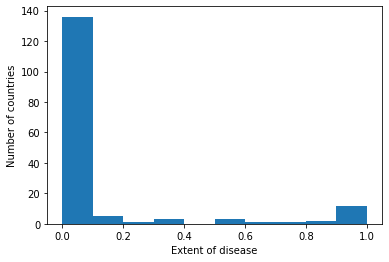

In [63]:
plt.hist(df["disa10"])
plt.xlabel("Extent of disease")
plt.ylabel("Number of countries")
plt.show()

### 2.5 HDF5 files

HDF5 stands for Hierarchical Data Format version 5. It is standard for storing large quatities of numerical data. Datasets can be hundreds of gigabytes or terabytes. HDF5 can scale to exabytes.

We use the package `h5py` to read HDF5 files.

In [64]:
import h5py

In [65]:
data = h5py.File(ligo_file, "r")

In [66]:
print(type(data))
print(data.keys())
print(data["strain"].keys())

<class 'h5py._hl.files.File'>
<KeysViewHDF5 ['meta', 'quality', 'strain']>
<KeysViewHDF5 ['Strain']>


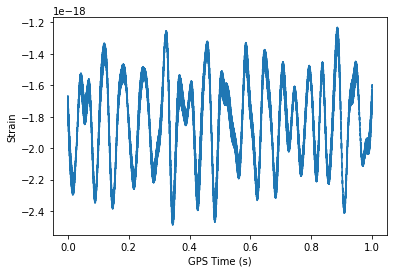

In [67]:
strain = data["strain"]["Strain"]
nb_samples = int(1e4)
gps_time = np.arange(0, 1, 1/nb_samples)

plt.plot(gps_time, strain[:nb_samples])
plt.xlabel("GPS Time (s)")
plt.ylabel("Strain")
plt.show()

### 2.6 MATLAB files

MATLAB data is saved in files with extension `.mat`.

We use the module `scipy.io` to read MATLAB files.

In [68]:
import scipy.io

In [69]:
mat = scipy.io.loadmat(albeck_file)

In [70]:
print(type(mat))
print(mat.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [71]:
print(type(mat["CYratioCyt"]))
data = mat["CYratioCyt"]
print(data.shape)

<class 'numpy.ndarray'>
(200, 137)


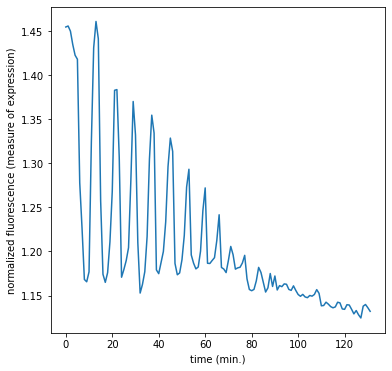

In [72]:
plt.figure(figsize=[6, 6])
plt.plot(data[25,5:])
plt.xlabel("time (min.)")
plt.ylabel("normalized fluorescence (measure of expression)")
plt.show()

## 3. Relational databases

In this section, we'll learn how to extract meaningful data from relational databases, an essential skill for any data scientist.

We use the package `sqlalchemy` as it works with many Relational Database Management Systems (RDMS).

In [73]:
from sqlalchemy import create_engine

### Create a database engine

The Engine is the starting point for any SQLAlchemy application.

In [74]:
db_url = "sqlite:///data/Chinook.sqlite"
engine = create_engine(db_url)

In [75]:
# get table names
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### 3.1 Query data using a connection

In [76]:
query = "SELECT * FROM Album"
with engine.connect() as conn:
    rs = conn.execute(query)
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

display(df.head())
print(len(df))

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


347


### 3.2 Query data using Pandas method

In [77]:
query = "SELECT * FROM Album"
df = pd.read_sql_query(query, engine)
display(df.head())
print(len(df))

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


347
